In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
%matplotlib inline

In [2]:
rawdf=pd.read_pickle('bigtrainingdataset.pickle')
df=rawdf.drop(['key','myteam','oppteam','gamedate'],axis=1)

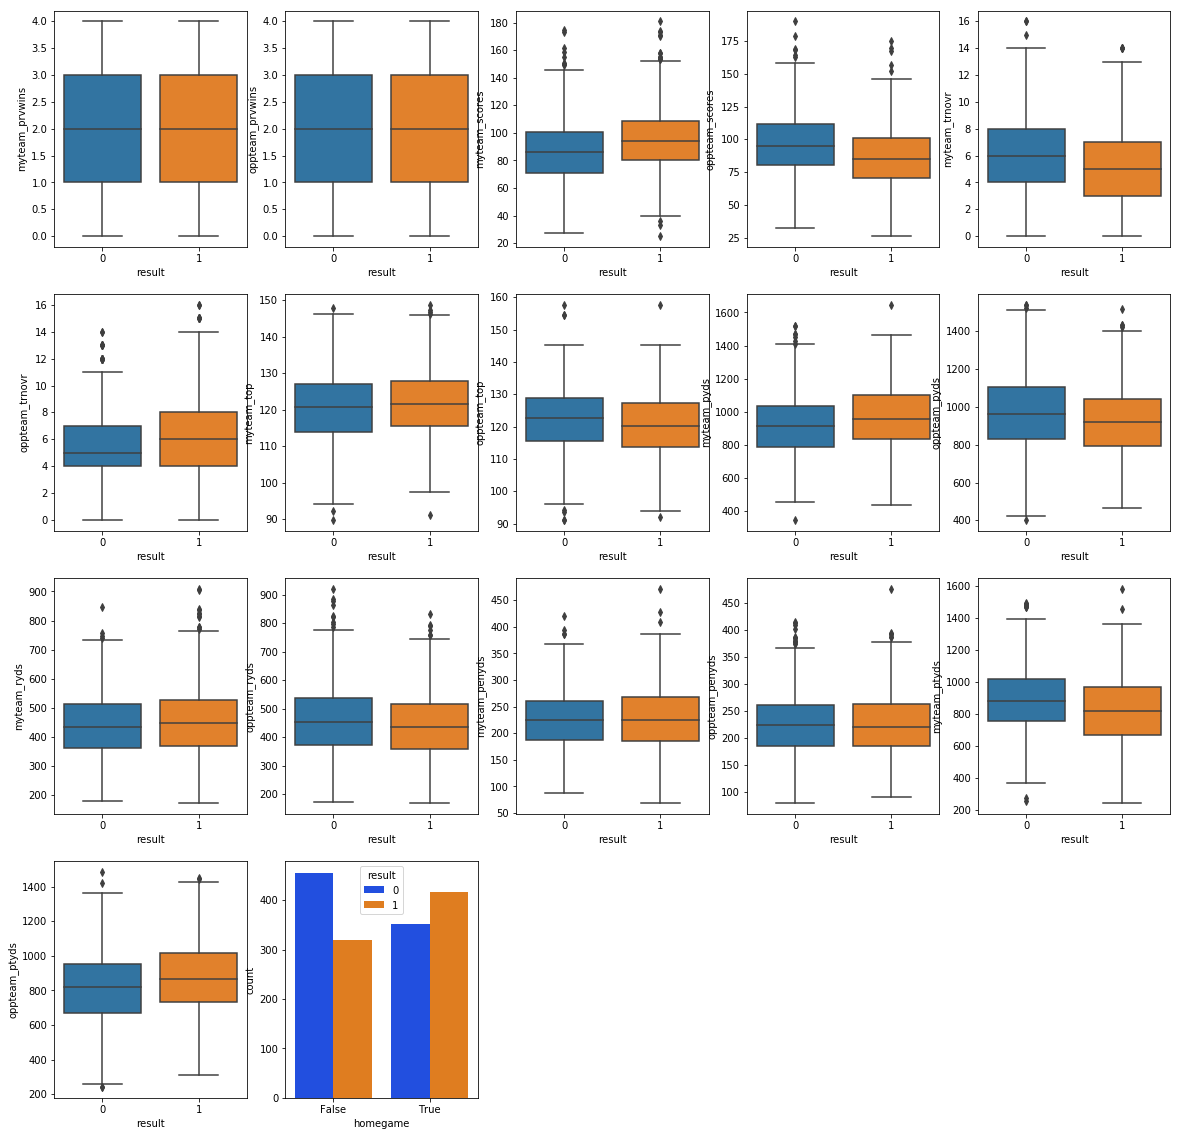

In [3]:
# 'myteam_prvwins', 'oppteam_prvwins', 'homegame', 'result',
#        'myteam_scores', 'oppteam_scores', 'myteam_trnovr', 'oppteam_trnovr',
#        'myteam_top', 'oppteam_top', 'myteam_pyds', 'oppteam_pyds',
#        'myteam_ryds', 'oppteam_ryds', 'myteam_penyds', 'oppteam_penyds',
#        'myteam_ptyds', 'oppteam_ptyds'

plt.figure(figsize=[20,20])
plt.subplot(451)
sns.boxplot(data=df,x='result',y='myteam_prvwins')
plt.subplot(452)
sns.boxplot(data=df,x='result',y='oppteam_prvwins')
plt.subplot(453)
sns.boxplot(data=df,x='result',y='myteam_scores')
plt.subplot(454)
sns.boxplot(data=df,x='result',y='oppteam_scores')
plt.subplot(455)
sns.boxplot(data=df,x='result',y='myteam_trnovr')
plt.subplot(456)
sns.boxplot(data=df,x='result',y='oppteam_trnovr')
plt.subplot(457)
sns.boxplot(data=df,x='result',y='myteam_top')
plt.subplot(458)
sns.boxplot(data=df,x='result',y='oppteam_top')
plt.subplot(459)
sns.boxplot(data=df,x='result',y='myteam_pyds')
plt.subplot(4,5,10)
sns.boxplot(data=df,x='result',y='oppteam_pyds')
plt.subplot(4,5,11)
sns.boxplot(data=df,x='result',y='myteam_ryds')
plt.subplot(4,5,12)
sns.boxplot(data=df,x='result',y='oppteam_ryds')
plt.subplot(4,5,13)
sns.boxplot(data=df,x='result',y='myteam_penyds')
plt.subplot(4,5,14)
sns.boxplot(data=df,x='result',y='oppteam_penyds')
plt.subplot(4,5,15)
sns.boxplot(data=df,x='result',y='myteam_ptyds')
plt.subplot(4,5,16)
sns.boxplot(data=df,x='result',y='oppteam_ptyds')
plt.subplot(4,5,17)
sns.countplot(x="homegame", hue="result", data=df,palette="bright")


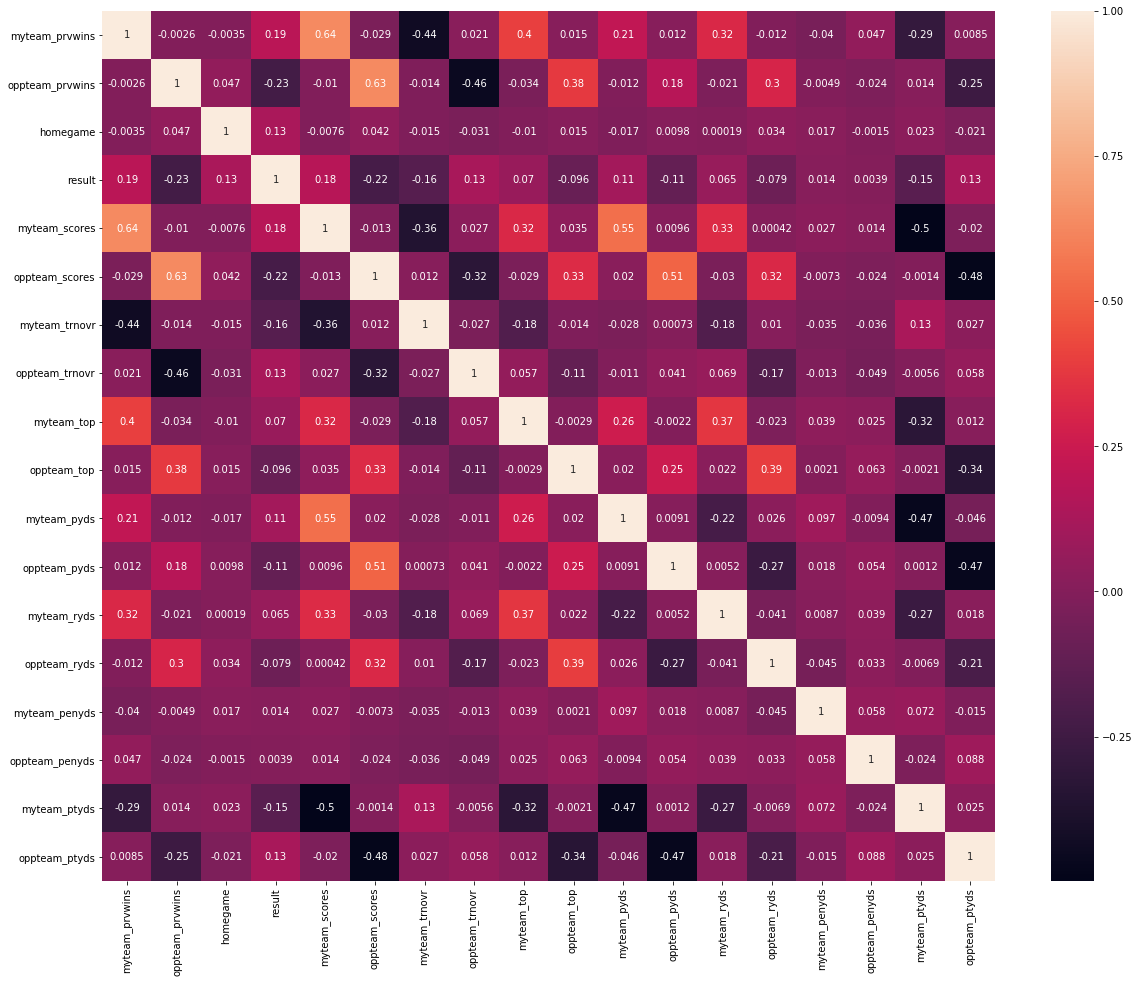

In [4]:
plt.figure(figsize=[20,16])
sns.heatmap(df.corr(),annot=True)

Clear Correlation above between MyTeamScores and MyteamPreviousWins and between MyteamScores and MyteamPassyards
Also, More punt yards results in lower scores, My team Punt Yards is Inversely Correlated with Myteam scores,MyteamPasyards

Penalty Yards can probably be dropped..Very little correlation with result as well as other variables
We will also drop either My team Scores and My team Previous Wins(Mostly my team previous wins)

In [5]:
X,y=df.drop(['result','myteam_penyds','oppteam_penyds',
             'myteam_prvwins','oppteam_scores',
             'myteam_trnovr','oppteam_trnovr','myteam_top','oppteam_top'
            ],axis=1),df[['result']]
X=pd.DataFrame(StandardScaler().fit_transform(X),columns=X.columns)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,shuffle=True)

/Users/abhijitshingote/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype bool, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/abhijitshingote/miniconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype bool, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [6]:
mydictofmodels=[
    {
        'estimator':LogisticRegression(),
        'name':'LogisticRegression',
        'parameters':{
            'solver':['lbfgs','liblinear'],
            'C':[1.0,0.8,0.5,0.3]
        }
    },
        {
        'estimator':RidgeClassifier(),
        'name':'Ridge Classifier',
        'parameters':{
            'alpha':[1.0,2.0,10.0,0.5],
            'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']
        }
    },
        {
        'estimator':GaussianNB(),
        'name':'Gaussian Naive Bayes',
        'parameters':{
#             'solver':['lbfgs','linear']
        }
    },
            {
        'estimator':DecisionTreeClassifier(),
        'name':'Decision Tree',
        'parameters':{
            'min_samples_split':[2,5,10,20,40],
            'min_samples_leaf' :[20,40,60,100],
            'max_depth':[3,5,10,25]
        }
    },
            {
        'estimator':RandomForestClassifier(),
        'name':'Random Forest',
        'parameters':{
            'min_samples_split':[2,5,10,20,40],
            'min_samples_leaf' :[20,40,60,100],
            'n_estimators':[100]
        }
    },
    {
        'estimator':SVC(),
        'name':'SVC',
        'parameters':{
            'gamma':['auto','scale']
        }
    }
    
]

In [7]:
for model in mydictofmodels:
    gsmodel=GridSearchCV(model['estimator'],param_grid=model['parameters'],cv=5,verbose=True)
    gsmodel.fit(X_train,np.array(y_train).ravel())
    print(model['name'],' -- ',gsmodel.score(X_test,y_test))
    print(gsmodel.best_params_,'\n')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits
LogisticRegression  --  0.6451016635859519
{'C': 0.5, 'solver': 'liblinear'} 

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Ridge Classifier  --  0.6451016635859519
{'alpha': 2.0, 'solver': 'auto'} 

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Gaussian Naive Bayes  --  0.6487985212569316
{} 

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Decision Tree  --  0.6247689463955638
{'max_depth': 5, 'min_samples_leaf': 40, 'min_samples_split': 2} 

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   12.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Random Forest  --  0.6543438077634011
{'min_samples_leaf': 20, 'min_samples_split': 2, 'n_estimators': 100} 

Fitting 5 folds for each of 2 candidates, totalling 10 fits
SVC  --  0.6506469500924215
{'gamma': 'scale'} 



[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished
